In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
#Mais uma maneira de efetuar upload dos arquivos
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
#Criar DataFrame
df = pd.read_excel('AdventureWorks.xlsx')

In [5]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
#Quantidade de linhas e colunas
df.shape

(904, 16)

In [7]:
#Vericar os tipos de dados 
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [8]:
#Receita total 
df['Valor Venda'].sum()

5984606.1426

In [9]:
#Custo total venda
df['Custo'] = df['Custo Unitário'] * df['Quantidade'] #Cria coluna de custo

In [10]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [12]:
#Custo total somado
round(df['Custo'].sum(), 2)

2486783.05

In [14]:
#Com os valores de receita e custo, iremos achar o lucro total
#Criar uma coluna de lucro que será receita - custo da venda
df['lucro'] = df['Valor Venda'] - df['Custo']

In [15]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [16]:
#Soma do lucro total
round(df['lucro'].sum(), 2)

3497823.09

In [18]:
#Criando coluna com total de dias para enviar o produto
df['Tempo Envio'] = df['Data Envio'] - df['Data Venda']

In [19]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [20]:
#@title Agora, queremos saber a média do tempo de envio para cada Marca, e para isso precisamos transformar a coluna Tempo Envio em númerica


In [22]:
#Extraindo apenas os dias 
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [23]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [24]:
#Verificando o tipo da coluna Tempo Envio
df['Tempo Envio'].dtype

dtype('int64')

In [25]:
#Média do tempo de envio de cada marca
df.groupby('Marca')['Tempo Envio'].mean() #.mean() retorna média

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Envio, dtype: float64

In [26]:
#@title Verificando se existem dados faltantes

In [27]:
#Verificando se existe valor vazio
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
lucro             0
Tempo Envio       0
dtype: int64

In [28]:
#@title Lucro por ano e por marca

In [30]:
#Agrupando por ano e marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['lucro'].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [41]:
#Melhorando visualização 
pd.options.display.float_format = '{:20,.2f}'.format

In [32]:
df.groupby([df['Data Venda'].dt.year, 'Marca'])['lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [37]:
#Resetando o index
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['lucro'].sum().reset_index()

In [39]:
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [42]:
#Total de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending = False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

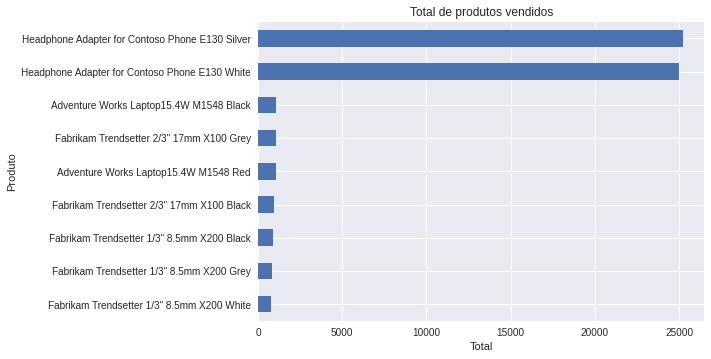

In [45]:
#Colocando a informação acima em um gráfico
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending = True).plot.barh(title = 'Total de produtos vendidos')
plt.xlabel('Total')
plt.ylabel('Produto');

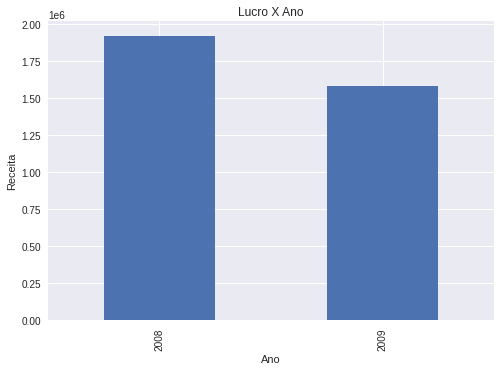

In [49]:
#Lucro por ano
df.groupby(df['Data Venda'].dt.year)['lucro'].sum().plot.bar(title = 'Lucro X Ano')
plt.xlabel('Ano')
plt.ylabel('Receita');

In [50]:
df.groupby(df['Data Venda'].dt.year)['lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [52]:
#Selecionando apenas as vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [53]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


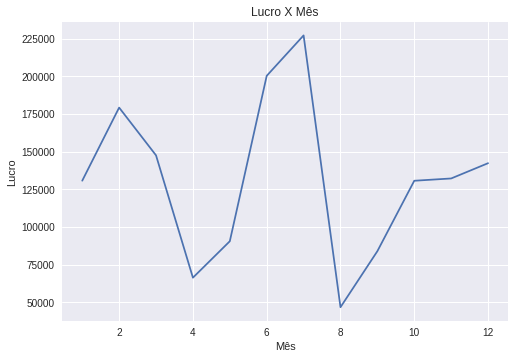

In [54]:
#Gráfico de linha de lucro por mês
df_2009.groupby(df_2009['Data Venda'].dt.month)['lucro'].sum().plot(title = 'Lucro X Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro');

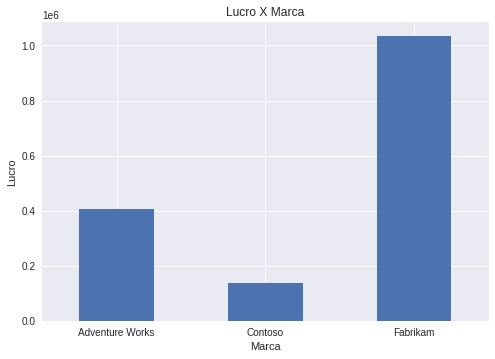

In [57]:
#Lucro por marcas
df_2009.groupby('Marca')['lucro'].sum().plot.bar(title = 'Lucro X Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation ='horizontal'); #Muda a rotação do texto do eixo x

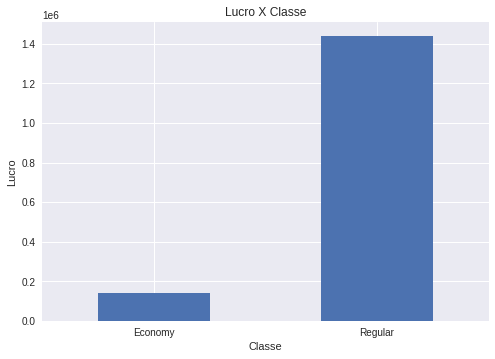

In [59]:
#Lucro por classe
df_2009.groupby('Classe')['lucro'].sum().plot.bar(title = 'Lucro X Classe')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation ='horizontal');

In [60]:
#Analisando melhor o tempo de envio 
df['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

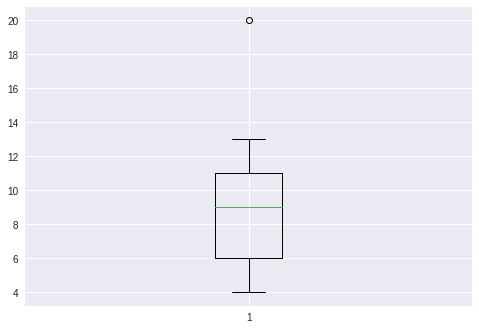

In [61]:
#Gráfico de Boxplot
plt.boxplot(df['Tempo Envio']);

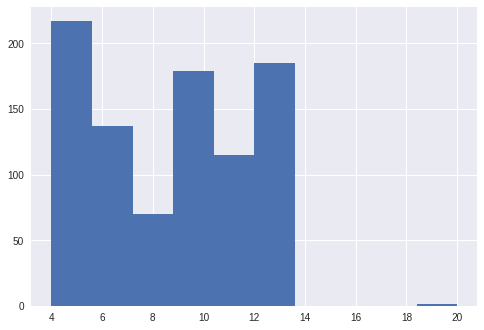

In [62]:
#Histograma
plt.hist(df['Tempo Envio']);

In [63]:
#Tempo mínimo de envio
df['Tempo Envio'].min()

4

In [64]:
#Tempo Máximo de envio
df['Tempo Envio'].max()

20

In [66]:
#Identificando o outlier
df[df['Tempo Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [67]:
df.to_csv('df_vendas_novo.csv', index = False)